In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

np.random.seed(25)

# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

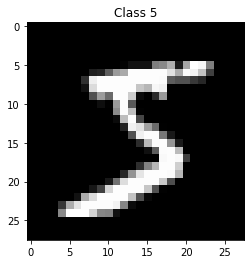

In [12]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [13]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train.shape,X_test.shape

((60000, 28, 84), (10000, 28, 84))

In [14]:
# Reshape images as per the tensor format required by tensorflow

X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)
X_test.shape,X_train.shape

((10000, 28, 28, 3), (60000, 28, 28, 3))

In [15]:
# Resize the images 48*48 as required by VGG16

from tensorflow.keras.utils import img_to_array, array_to_img

X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
#train_x = preprocess_input(x)
X_train.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
# X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [16]:
class_names = np.unique(y_train)
print(class_names)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
y_test[2]

1

In [17]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 48, 48, 3)
(10000, 48, 48, 3)
(60000, 10)
(10000, 10)


In [20]:
# add preprocessing layer to the front of VGG
from tensorflow.keras.applications import VGG16
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False,input_shape=(48,48,3))
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False
    
#add a global spatial average pooling layer
x = Flatten()(base_model.output)
# Add dense layer
x = Dense(100,activation='relu')(x)
x = Dense(100,activation='relu')(x)
x = Dense(100,activation='relu')(x)

predictions = Dense(10,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [22]:
hist= model.fit(X_train, y_train,batch_size=128, 
          epochs=20,verbose=True, 
          validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 994s 2s/step - loss: 0.4127 - accuracy: 0.8717 - val_loss: 0.2005 - val_accuracy: 0.9352
Epoch 2/20
469/469 [==============================] - 985s 2s/step - loss: 0.1749 - accuracy: 0.9436 - val_loss: 0.1634 - val_accuracy: 0.9443
Epoch 3/20
469/469 [==============================] - 974s 2s/step - loss: 0.1482 - accuracy: 0.9523 - val_loss: 0.1473 - val_accuracy: 0.9512
Epoch 4/20
469/469 [==============================] - 977s 2s/step - loss: 0.1325 - accuracy: 0.9571 - val_loss: 0.1402 - val_accuracy: 0.9543
Epoch 5/20
469/469 [==============================] - 967s 2s/step - loss: 0.1183 - accuracy: 0.9610 - val_loss: 0.1322 - val_accuracy: 0.9577
Epoch 6/20
469/469 [==============================] - 969s 2s/step - loss: 0.1156 - accuracy: 0.9621 - val_loss: 0.1284 - val_accuracy: 0.9585
Epoch 7/20
469/469 [==============================] - 968s 2s/step - loss: 0.1077 - accuracy: 0.9646 - val_loss: 0.1307 - val_accuracy: 0.9568

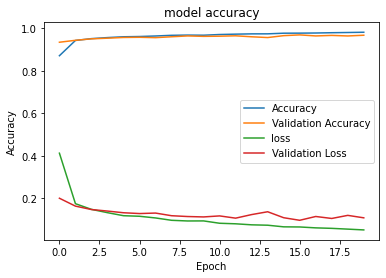

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## model_save_name = 'LeNet-5 Adam.h5'
## model.save('/content/gdrive/MyDrive/CNN_Models/{model_save_name}')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/CNN_Models/{model_save_name}/assets


In [ ]:
# model.save("VGG16_Adam.h5")

In [ ]:
--------------------------------------------------

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/gdrive/MyDrive/CNN_Models/LeNet-5_Adam.h5')

In [24]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])


313/313 [==============================] - 151s 481ms/step - loss: 0.1083 - accuracy: 0.9682

Test accuracy:  0.9682000279426575


In [25]:
y_pred = model.predict(X_test)
y_pred_probabilities = model.predict(X_test)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred_probabilities

array([[0.05854007, 0.05844117, 0.1247424 , ..., 0.40974662, 0.10429846,
        0.01091308],
       [0.05854007, 0.05844117, 0.1247424 , ..., 0.40974662, 0.10429846,
        0.01091308],
       [0.05854007, 0.05844117, 0.1247424 , ..., 0.40974662, 0.10429846,
        0.01091308],
       ...,
       [0.05854007, 0.05844117, 0.1247424 , ..., 0.40974662, 0.10429846,
        0.01091308],
       [0.05854007, 0.05844117, 0.1247424 , ..., 0.40974662, 0.10429846,
        0.01091308],
       [0.05854007, 0.05844117, 0.1247424 , ..., 0.40974662, 0.10429846,
        0.01091308]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_original= np.argmax(y_test,axis=1)

In [ ]:
y_test_original

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_true=y_test_original, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.95      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print(confusion_matrix(y_true=y_test_original, y_pred=y_pred))

[[ 971    0    0    0    0    3    3    1    2    0]
 [   0 1120    2    0    0    0    2    1   10    0]
 [   3    1 1016    3    0    0    0    3    6    0]
 [   1    0    6  988    0    6    0    4    5    0]
 [   0    0    3    1  963    0    1    1    1   12]
 [   0    0    0   10    0  876    3    0    1    2]
 [   9    3    0    0    3   10  930    0    3    0]
 [   1    2   26    7    1    0    0  978    4    9]
 [   2    0    3    5    1    3    3    4  948    5]
 [   1    0    2    4    9    5    0    6    3  979]]


In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
normalize=False,
title='Confusion matrix',
cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix\n============================")
  else:
    print('Confusion matrix, without normalization\n============================')


  print(cm)
  print("\n")
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true=y_test_original, y_pred=y_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
title='Normalized confusion matrix')
plt.show()


In [ ]:

print("Precision Score : ",precision_score(y_test_original, y_pred, average='micro'))

Precision Score :  0.9769


In [ ]:
print("Recall Score : ",recall_score(y_test_original, y_pred, average='micro'))

Recall Score :  0.9769


In [ ]:
print("Accuracy Score : ",accuracy_score(y_test_original, y_pred))

Accuracy Score :  0.9769


In [ ]:
print("F1 Score : ",f1_score(y_test_original, y_pred, average='micro'))

F1 Score :  0.9769


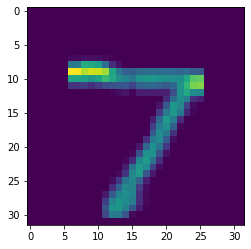

In [ ]:
plt.imshow((tf.squeeze(x_test[0])))
plt.show()

In [ ]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))

7


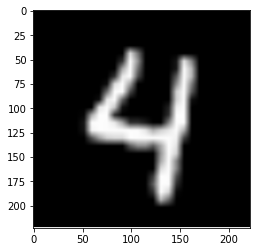

In [ ]:
from PIL import Image
image=Image.open('test.jpg')
plt.imshow(image)


In [ ]:
print(image.size)
print(type(image))

(222, 223)
<class 'PIL.PngImagePlugin.PngImageFile'>


In [ ]:
import cv2
image = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (32, 32))
image = image.astype('float32')
image = image.reshape(1, 32, 32, 1)
image /= 255

In [ ]:
pred = model.predict(image, batch_size=1)
print(pred.argmax())

4
